In [78]:
# A collection of other plots for the report
import uproot
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src.constants import POT_RUN1_MICROBOONE, POT_RUN3_MICROBOONE

0.6464646464646465


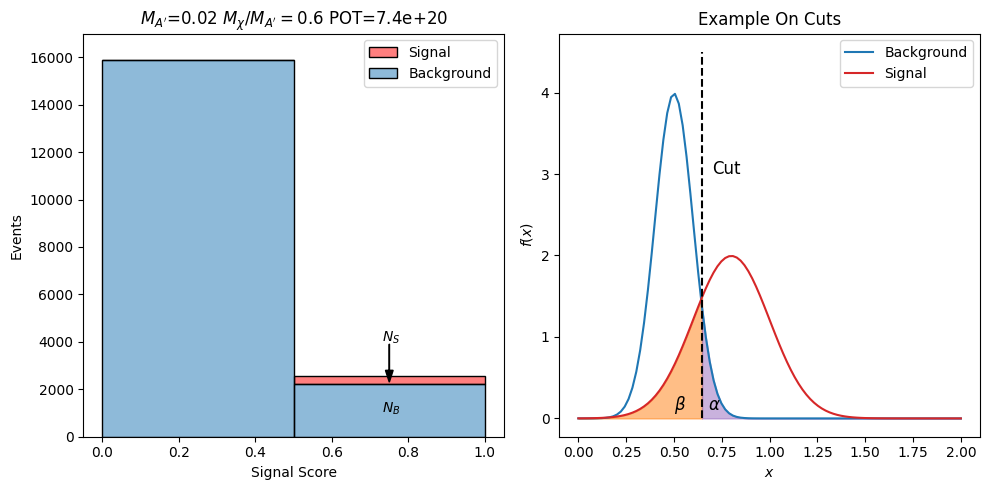

In [129]:
fig = plt.figure(figsize=(10, 5))
ax = fig.subplots(1,2)

# ax[0] is an example histogram
# ax[1] is an example of signal / background separation

def gauss(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))

bins = [0, 0.5, 1.0]
data = uproot.open("../data/root/hist/fixed_dt/scalar_ma_0.02_dt_0.6.root")
ma = 0.02
dt = 0.6
# i want the background histogram to start at the top of the signal histogram
# ax[0].stairs(data["background"].values() + data["signal"].values(), bins, color="k")
# ax[0].stairs(data["background"].values() + data["signal"].values(), bins, color="tab:blue", label="Background", alpha=0.5, fill=True)
# ax[0].stairs(data["signal"].values(), bins, color="tab:red", label="Signal", alpha=.9, fill=True)
# ax[0].set(xlabel="Signal Score", ylabel="Events", title=r"$M_{A'}$="+f"{ma} "+r"$M_\chi/M_{A'}=$"+f"{dt} POT={POT_RUN1_MICROBOONE + POT_RUN3_MICROBOONE}")
# ax[0].legend()
ax[0].bar(0.25, data["signal"].values()[0], bottom=data["background"].values()[0], width=0.5, color=(1,0,0,0.5), label="Signal", edgecolor="k")
ax[0].bar(0.75, data["signal"].values()[1], bottom=data["background"].values()[1], width=0.5, color=(1,0,0,0.5), edgecolor="k")
ax[0].bar(0.25, data["background"].values()[0], width=0.5, color=(0.122,0.467,0.706,0.5), label="Background", edgecolor="k")
ax[0].bar(0.75, data["background"].values()[1], width=0.5, color=(0.122,0.467,0.706,0.5), edgecolor="k")
ax[0].text(0.73, 1000, r"$N_B$")
ax[0].text(0.73, 4000, r"$N_S$")
ax[0].arrow(0.75, 3900, 0, -1100, head_width=0.02, head_length=500, fc='k', ec='k')
ax[0].set(xlabel="Signal Score", ylabel="Events", title=r"$M_{A'}$="+f"{ma} "+r"$M_\chi/M_{A'}=$"+f"{dt} POT={POT_RUN1_MICROBOONE + POT_RUN3_MICROBOONE}")
ax[0].set_ylim(0, 17000)
ax[0].legend()

x = np.linspace(0, 2, 100)
ax[1].plot(x, gauss(x, 0.5, 0.1), color="tab:blue", label="Background")
ax[1].plot(x, gauss(x, 0.8, 0.2), color="tab:red", label="Signal")
print(x[32])
ax[1].vlines(x[32], 0, 4.5, color="k", linestyle="--")
ax[1].text(0.7, 3, "Cut", fontsize=12)
ax[1].fill_between(x[0:33], gauss(x[0:33], 0.8, 0.2), color="tab:orange", alpha=0.5)
ax[1].text(0.5, 0.1, r"$\beta$", fontsize=12)
ax[1].fill_between(x[32:], gauss(x[32:], 0.5, 0.1), color="tab:purple", alpha=0.5)
ax[1].text(0.68, 0.1, r"$\alpha$", fontsize=12)
ax[1].set(xlabel=r"$x$", ylabel=r"$f(x)$", title="Example On Cuts")
ax[1].legend()

fig.tight_layout()
fig.savefig("../plots/example_hist.png")
fig.savefig("../plots/example_hist.pdf")